In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
label = []

In [4]:
ficheiro = open("..\\Dataset\\28-02-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()
countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
#for i in range(10000):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(21) + "", '%d/%m/%Y %H:%M:%S').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()


In [5]:
print(label[32])

['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', 'Benign', '443', '6', '60971210', '13', '15', '339', '3264', '207', '0', '26.0769230769', '64.4792751439', '1460', '0', '217.6', '507.1374567117', '59.093463948', '0.4592331364', '2258192.96296296', '4221258.15627905', '10008522', '0', '60971210', '5080934.16666667', '5206600.43673163', '10077854', '139', '60901300', '4350092.85714286', '5147223.20403585', '10078748', '0', '272', '304', '0.2132153848', '0.2460177517', '0', '1460', '124.2413793103', '374.2599035022', '140070.475369458', '1', '128.6785714286', '26.0769230769', '217.6', '13', '339', '15', '3264', '8192', '48180', '8', '20', '99850.1666666667', '74094.4086916595', '251094', '69332', '10007229.1666667', '2471.4096719619', '10008522', '10002209\n', datetime.time(8, 23, 19)]


In [6]:
label.sort(key = lambda array : array[len(array) - 1])

In [7]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [8]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(18)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])

In [9]:
print(str(a) + " " + str(b))

68236 538666


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [11]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.2, shuffle = False)

In [12]:
print(len(inp_train[0]))

78


In [13]:
inp_train = np.array(inp_train).reshape(len(inp_train), 78,1)
out_train = np.array(out_train).reshape(len(out_train),1)
inp_test = np.array(inp_test).reshape(len(inp_test), 78,1)
out_test = np.array(out_test).reshape(len(out_test),1)

In [14]:
model = keras.Sequential([
    layers.LSTM(units = 32, input_shape = (78, 1), return_sequences = True, use_bias = True),
    layers.LSTM(units = 16, return_sequences = True, use_bias = True),
    layers.LSTM(units = 6, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [15]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [16]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, validation_data=(inp_test, out_test), epochs= 5, verbose = 1)

Epoch 1/5
13656/13656 [==============================] - 764s 56ms/step - loss: 0.2265 - accuracy: 0.9409 - val_loss: 0.8263 - val_accuracy: 0.7242
Epoch 2/5
13656/13656 [==============================] - 795s 58ms/step - loss: 0.2245 - accuracy: 0.9410 - val_loss: 0.8553 - val_accuracy: 0.7242
Epoch 3/5
13656/13656 [==============================] - 801s 59ms/step - loss: 0.2224 - accuracy: 0.9417 - val_loss: 0.8056 - val_accuracy: 0.7242
Epoch 4/5
13656/13656 [==============================] - 801s 59ms/step - loss: 0.2242 - accuracy: 0.9410 - val_loss: 0.8111 - val_accuracy: 0.7242
Epoch 5/5
13656/13656 [==============================] - 804s 59ms/step - loss: 0.2268 - accuracy: 0.9401 - val_loss: 0.8557 - val_accuracy: 0.7242


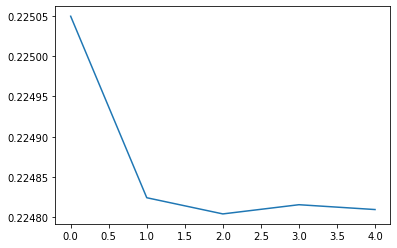

In [17]:
plt.plot(train.history["loss"])
plt.show()

In [17]:
model.save("InfiltrationNet(28-02-2018).h5")

In [18]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [19]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [20]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[92387     0]
 [28994     0]]


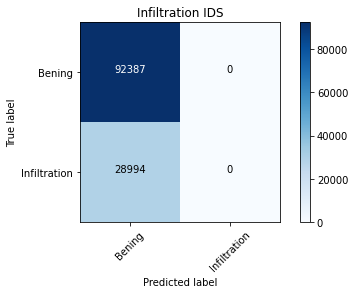

In [21]:
labels = ["Bening", "Infiltration"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Infiltration IDS")